<a href="https://colab.research.google.com/github/Satyake/One-Shot-Learning/blob/master/SIAMESE_INCEPDENSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!unzip /content/oslmobi.zip
#!unzip /content/orl_faces.zip

In [ ]:
import re
import numpy as np
from keras.callbacks import TensorBoard

from PIL import Image

from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.layers import Activation
from keras.layers import Input, Lambda, Dense, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from keras.models import Input
import keras 
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.regularizers import l2
from keras.optimizers import SGD, RMSprop
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization 
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D,Add
from keras import models
from keras.models import Model
import tensorflow as tf
import keras
from keras.layers import Dense,Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten,Concatenate,Input,Lambda
from keras.models import Sequential
import tensorflow as tf
import numpy as np 
import random
import matplotlib.pyplot as plt
from keras.models import Model
from keras import backend as K
import numpy as np
import glob
from sklearn.preprocessing import LabelBinarizer
import cv2
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
import random
import matplotlib.patheffects as PathEffects
from keras.layers import Input, Conv2D, Lambda, Dense, Flatten,MaxPooling2D, concatenate
from keras.models import Model, Sequential
from keras.regularizers import l2
from keras import backend as K
from keras.optimizers import SGD,Adam
from keras.losses import binary_crossentropy
import os
import pickle
import matplotlib.pyplot as plt
from itertools import permutations
import seaborn as sns
from keras.datasets import mnist
from sklearn.manifold import TSNE
from sklearn.svm import SVC

In [ ]:
def read_image(filename, byteorder='>'):
    
    #first we read the image, as a raw file to the buffer
    with open(filename, 'rb') as f:
        buffer = f.read()
    
    #using regex, we extract the header, width, height and maxval of the image
    header, width, height, maxval = re.search(
        b"(^P5\s(?:\s*#.*[\r\n])*"
        b"(\d+)\s(?:\s*#.*[\r\n])*"
        b"(\d+)\s(?:\s*#.*[\r\n])*"
        b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    
    #then we convert the image to numpy array using np.frombuffer which interprets buffer as one dimensional array
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))



In [ ]:
#a=Image.open("/content/F01_112x92_1_92x112.pgm")


In [ ]:
#img = read_image("/content/F01_112x92_1_92x112.pgm")

In [ ]:
#img.shape

In [ ]:
size = 2
total_sample_size = 30


def get_data(size, total_sample_size):
    #read the image
    image = read_image('/content/orl_faces/s' + str(1) + '/' + str(1) + '.pgm', 'rw+')
    #reduce the size
    image = image[::size, ::size]
    #get the new size
    dim1 = image.shape[0]
    dim2 = image.shape[1]

    count = 0
    
    #initialize the numpy array with the shape of [total_sample, no_of_pairs, dim1, dim2]
    x_geuine_pair = np.zeros([total_sample_size, 2, 1, dim1, dim2])  # 2 is for pairs
    y_genuine = np.zeros([total_sample_size, 1])
    
    for i in range(2):
        for j in range(int(total_sample_size/2)):
            ind1 = 0
            ind2 = 0
            
            #read images from same directory (genuine pair)
            while ind1 == ind2:
                ind1 = np.random.randint(2)
                ind2 = np.random.randint(2)
            
            # read the two images
            img1 = read_image('/content/orl_faces/s' + str(i+1) + '/' + str(ind1 + 1) + '.pgm', 'rw+')
            img2 = read_image('/content/orl_faces/s' + str(i+1) + '/' + str(ind2 + 1) + '.pgm', 'rw+')
            
            #reduce the size
            img1 = img1[::size, ::size]
            img2 = img2[::size, ::size]
            
            #store the images to the initialized numpy array
            x_geuine_pair[count, 0, 0, :, :] = img1
            x_geuine_pair[count, 1, 0, :, :] = img2
            
            #as we are drawing images from the same directory we assign label as 1. (genuine pair)
            y_genuine[count] = 1
            count += 1

    count = 0
    x_imposite_pair = np.zeros([total_sample_size, 2, 1, dim1, dim2])
    y_imposite = np.zeros([total_sample_size, 1])
    
    for i in range(int(total_sample_size/10)):
        for j in range(2):
            
            #read images from different directory (imposite pair)
            while True:
                ind1 = np.random.randint(2)
                ind2 = np.random.randint(2)
                if ind1 != ind2:
                    break
                    
            img1 = read_image('/content/orl_faces/s' + str(ind1+1) + '/' + str(j + 1) + '.pgm', 'rw+')
            img2 = read_image('/content/orl_faces/s' + str(ind2+1) + '/' + str(j + 1) + '.pgm', 'rw+')

            img1 = img1[::size, ::size]
            img2 = img2[::size, ::size]

            x_imposite_pair[count, 0, 0, :, :] = img1
            x_imposite_pair[count, 1, 0, :, :] = img2
            #as we are drawing images from the different directory we assign label as 0. (imposite pair)
            y_imposite[count] = 0
            count += 1
            
    #now, concatenate, genuine pairs and imposite pair to get the whole data
    X = np.concatenate([x_geuine_pair, x_imposite_pair], axis=0)/255
    Y = np.concatenate([y_genuine, y_imposite], axis=0)

    return X, Y

In [ ]:
#size = 2
#total_sample_size = 30


#def get_datat(size, total_sample_size):
    #read the image
 #   image = read_image('/content/New folder/s' + str(1) + '/' + str(1) + '.pgm', 'rw+')
    #reduce the size
  #  image = image[::size, ::size]
    #get the new size
   # dim1 = image.shape[0]
    #dim2 = image.shape[1]

    #count = 0
    
    #initialize the numpy array with the shape of [total_sample, no_of_pairs, dim1, dim2]
   # x_geuine_pair = np.zeros([total_sample_size, 2, 1, dim1, dim2])  # 2 is for pairs
   # y_genuine = np.zeros([total_sample_size, 1])
    
    #for i in range(2):
     #   for j in range(int(total_sample_size/2)):
      #      ind1 = 0
       #     ind2 = 0
            
            #read images from same directory (genuine pair)
        #    while ind1 == ind2:
         #       ind1 = np.random.randint(2)
          #      ind2 = np.random.randint(2)
            
            # read the two images
           # img1 = read_image('/content/New folder/s' + str(i+1) + '/' + str(ind1 + 1) + '.pgm', 'rw+')
            #img2 = read_image('/content/New folder/s' + str(i+1) + '/' + str(ind2 + 1) + '.pgm', 'rw+')
            
            #reduce the size
            #img1 = img1[::size, ::size]
            #img2 = img2[::size, ::size]
            
            #store the images to the initialized numpy array
            #x_geuine_pair[count, 0, 0, :, :] = img1
            #x_geuine_pair[count, 1, 0, :, :] = img2
            
            #as we are drawing images from the same directory we assign label as 1. (genuine pair)
            #y_genuine[count] = 1
            #count += 1

    #count = 0
    #x_imposite_pair = np.zeros([total_sample_size, 2, 1, dim1, dim2])
    #y_imposite = np.zeros([total_sample_size, 1])
    
    #for i in range(int(total_sample_size/10)):
     #   for j in range(4):
            
            #read images from different directory (imposite pair)
      #      while True:
       #         ind1 = np.random.randint(2)
        #        ind2 = np.random.randint(2)
         #       if ind1 != ind2:
          #          break
                    
           # img1 = read_image('/content/New folder/s' + str(ind1+1) + '/' + str(j + 1) + '.pgm', 'rw+')
           # img2 = read_image('/content/New folder/s' + str(ind2+1) + '/' + str(j + 1) + '.pgm', 'rw+')

            #img1 = img1[::size, ::size]
            #img2 = img2[::size, ::size]

            #x_imposite_pair[count, 0, 0, :, :] = img1
            #x_imposite_pair[count, 1, 0, :, :] = img2
            #as we are drawing images from the different directory we assign label as 0. (imposite pair)
            #y_imposite[count] = 0
            #count += 1
            
    #now, concatenate, genuine pairs and imposite pair to get the whole data
    #X = np.concatenate([x_geuine_pair, x_imposite_pair], axis=0)/255
    #Y = np.concatenate([y_genuine, y_imposite], axis=0)

    #return X, Y

In [ ]:
X, Y = get_data(size, total_sample_size)

In [ ]:
#X1,Y1=get_datat(size,total_sample_size)

In [ ]:
#X1,Y1=get_data1(size,total_sample_size)

In [ ]:
X.shape

(60, 2, 1, 56, 46)

In [ ]:
#X1.shape

In [ ]:
Y.shape

(60, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.96)

In [ ]:
#x_train2, x_test2, y_train2, y_test2 = train_test_split(X1, Y1, test_size=0.98)

In [ ]:
x_train.shape

(2, 2, 1, 56, 46)

In [ ]:
#X_test1=x_test
#Y_test1=y_test #orl
#X_train1=x_train
#Y_train1=y_train

In [ ]:
#X_test2=x_test2
#y_test2=y_test2
#X_train2=x_train2
#y_train2=y_train2


In [ ]:
x_test.shape

(58, 2, 1, 56, 46)

In [ ]:
x_test=x_test/255
x_train=x_train/255

In [ ]:
x_train.shape

(2, 2, 1, 56, 46)

In [ ]:
#def base_model(input):
 #input=Input(input)
 #conv_10=keras.layers.Conv2D(32,10,strides=(1,1),padding='SAME',activation=tf.keras.layers.LeakyReLU(alpha=0.3),data_format='channels_first')(input)
 #conv_5=keras.layers.Conv2D(15,5,strides=(1,1),padding='SAME',activation='relu')(input)
 #conv_2=keras.layers.Conv2D(20,2,strides=(1,1),padding='SAME',activation='sigmoid')(input)
 #conv_1x1_standalone=keras.layers.Conv2D(100,1,strides=(1,1),padding='SAME',activation='relu')
 #conv_1x1_2_standalone=keras.layers.Conv2D(100,1,strides=(1,1),padding='SAME',activation='relu')
 #conv_1x1_3_standalone=keras.layers.Conv2D(100,1,strides=(1,1),padding='SAME',activation='relu')

 #concatenate conv_10 with conv 1x1
 #concat_1=(conv_1x1_standalone)(conv_10)
 #concatenate conv_5 with conv 1x1
 #concat_2=(conv_1x1_2_standalone)(conv_5)
 #concatenate cov_2 with conv1x1
 #concat_3=(conv_1x1_3_standalone)(conv_2)


 #MP1=keras.layers.MaxPool2D(pool_size=(1,1))
 #MP2=keras.layers.MaxPool2D(pool_size=(1,1))
 #MP3=keras.layers.MaxPool2D(pool_size=(1,1))

 #concat the concated layers with maxpool

 #layer1=(MP1)(concat_1)
 #layer2=(MP2)(concat_2)
 #layer3=(MP3)(concat_3)

# final concat layer 

 #concat_final= keras.layers.concatenate(inputs=[concat_1,concat_2,concat_3],axis=1)
 #flatten
 #concat_final_flatten=keras.layers.Flatten()(concat_final)


 #FC 
 #concat_fc=keras.layers.Dense(1055,activation='relu')(concat_final_flatten)
 #MODEL=keras.models.Model(inputs=input,outputs=concat_fc)

 #bottleneck layer
 #bneck=keras.layers.Conv2D(10,1,strides=1)(concat_final)
 #DenseNET 

 #conv_dense=keras.layers.Conv2D(50,2,activation='relu')(bneck)
 #conv_dense_1=keras.layers.Conv2D(10,2,activation='relu')(conv_dense)
 #con_dense_3=keras.layers.Conv2D(10,1)(conv_dense_1)
 #con_dense4=keras.layers.concatenate(inputs=[con_dense_3,conv_dense_1],axis=1)
 #con_dense5=keras.layers.Conv2D(10,2,padding='same',activation='relu')(con_dense4)
 #con_dense6=keras.layers.Conv2D(10,2,padding='same',activation='relu')(con_dense5)
 #con_dense7=keras.layers.concatenate(inputs=[con_dense6,con_dense5,con_dense4])
 #con_dense8=keras.layers.Conv2D(10,2,padding='same',activation='relu')(con_dense7)
 #con_dense9=keras.layers.Conv2D(10,2,padding='same',activation='relu')(con_dense8) 
 #con_dense10=keras.layers.concatenate(inputs=[con_dense8,con_dense9],axis=1)
 #con_dense_4=Add()([con_dense_3,conv_dense_1])
 #Bneck=keras.layers.Conv2D(2,1,padding='same')(con_dense10)
 #con_dense_11=keras.layers.Flatten()(Bneck)

 #concat_fc=keras.layers.Dense(1055,activation='relu')(con_dense_11)
 

 #MODEL=keras.models.Model(inputs=input,outputs=concat_fc)



 #return MODEL

In [ ]:
#def base_model(input):
 #input=Input(input)
 #conv1=keras.layers.Conv2D(4,1,strides=1,padding='SAME',activation='relu')(input)
 #rl=(keras.layers.LeakyReLU(alpha=0.03))(conv1)
 #conv2=keras.layers.Conv2D(4,1,strides=1,padding='SAME',activation='linear')(rl)
 #rl2=(keras.layers.LeakyReLU(alpha=0.03))(conv2)
 #fc=keras.layers.Flatten()(rl2)
 #d1=keras.layers.Dense(1000,activation='relu')(fc)
 #d2=keras.layers.Dense(1000,activation='relu')(d1)


 #MODEL=keras.models.Model(inputs=input,outputs=d2)



 #return MODEL

In [ ]:
def base_model(input):
 input=Input(input)
 x = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input)
 x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
 x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
 x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
 x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
 encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

 x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
 x = keras.layers.UpSampling2D((2, 2))(x)
 x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
 x = keras.layers.UpSampling2D((2, 2))(x)
 x = keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
 x = keras.layers.UpSampling2D((2, 2))(x)
 decoded = keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
 decoded_F=keras.layers.Flatten()(decoded)

 MODEL=keras.models.Model(inputs=input,outputs=decoded_F)



 return MODEL

In [ ]:
#Eucledian Distance Function  #Imported From Keras Documentation 
def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    margin = 1
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)

In [ ]:
x_train.shape[2:]

(1, 56, 46)

In [ ]:
input_dim = x_train.shape[2:]
img_a = Input(shape=input_dim)
img_b = Input(shape=input_dim)
#input_dim=(56,46,1)
#img_a=(56,46,1)
#img_b=(56,46,1)

In [ ]:
img_a.shape

TensorShape([None, 1, 56, 46])

In [ ]:
base_network = base_model(input_dim)
feat_vecs_a = base_network(img_a)
feat_vecs_b = base_network(img_b)

In [ ]:
def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [ ]:
distance = Lambda(euclidean_distance)([feat_vecs_a, feat_vecs_b])

In [ ]:
epochs = 100
rms = RMSprop()

In [ ]:
model = Model(inputs=[img_a, img_b], outputs=distance)

In [ ]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1, 56, 46)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1, 56, 46)]  0                                            
__________________________________________________________________________________________________
functional_1 (Functional)       (None, 208)          10865       input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 1)            0           functional_1[0][0]    

In [ ]:
%load_ext tensorboard
import tensorboard

In [ ]:
from datetime import datetime
from packaging import version



In [ ]:
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
from timeit import default_timer as timer

class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

cb = TimingCallback()

#model = Sequential()
# Your code
#model.fit(X, y, epochs=epochs, batch_size=batch_size, callbacks=[cb])
#print(cb.logs)
#print(sum(cb.logs))

In [ ]:
def contrastive_loss(y_true, y_pred):
    margin = 1
    return K.mean(y_true * K.square(y_pred) + (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))

In [ ]:
model.compile(loss=contrastive_loss, optimizer=rms)

In [ ]:
img_1 = x_train[:, 0]
img2 = x_train[:, 1]

In [ ]:
model.fit([img_1, img2], y_train,
          batch_size=128, verbose=2, epochs=10,callbacks=[cb])


Epoch 1/10
1/1 - 0s - loss: 0.5000
Epoch 2/10
1/1 - 0s - loss: nan
Epoch 3/10
1/1 - 0s - loss: nan
Epoch 4/10
1/1 - 0s - loss: nan
Epoch 5/10
1/1 - 0s - loss: nan
Epoch 6/10
1/1 - 0s - loss: nan
Epoch 7/10
1/1 - 0s - loss: nan
Epoch 8/10
1/1 - 0s - loss: nan
Epoch 9/10
1/1 - 0s - loss: nan
Epoch 10/10
1/1 - 0s - loss: nan


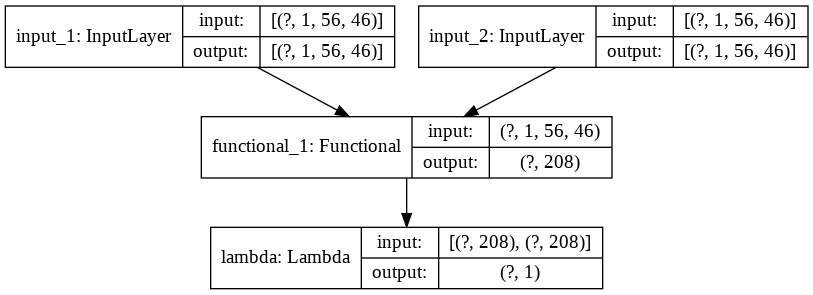

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(cb.logs)
print(sum(cb.logs))

[3.584136266999849, 0.008804907000012463, 0.007961240999975416, 0.007131828999717982, 0.007430958999975701, 0.006952984999770706, 0.007117367999853741, 0.006710483999995631, 0.007409654000184673, 0.007067489000291971]
3.650723182999627


In [ ]:
#%tensorboard --logdir logs

#ensorboard --logdir logs


In [ ]:
pred = model.predict([x_test[:, 0], x_test[:, 1]])

In [ ]:
def compute_accuracy(predictions, labels):
    return labels[predictions.ravel() < 0.5].mean()

In [ ]:
#y_test[pred.ravel()<0.5]

In [ ]:
pred.ravel()<0.5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,accuracy_score,precision_score
cm=confusion_matrix(pred.ravel()<0.5,y_test.ravel()>0.5)
ps=precision_score(pred.ravel()<0.5,y_test.ravel()>0.5)
acs=accuracy_score(pred.ravel()<0.5,y_test.ravel()>0.5)
rcs=recall_score(pred.ravel()<0.5,y_test.ravel()>0.5)
f1=f1_score(pred.ravel()<0.5,y_test.ravel()>0.5)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm

array([[29, 29],
       [ 0,  0]])

In [ ]:
print('Accuracy is ', acs)
print('sensitvity is',rcs)
print('precision is',ps)
print('fscore is ',f1)

Accuracy is  0.5
sensitvity is 0.0
precision is 0.0
fscore is  0.0


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:59: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


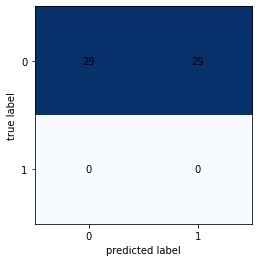

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array(cm)

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

In [ ]:
y_test.ravel()>0.5

array([False,  True,  True,  True, False, False, False, False,  True,
        True,  True, False, False, False, False,  True, False, False,
       False, False,  True, False, False,  True,  True,  True, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False, False,  True,  True])

In [ ]:
#y_test2.ravel()>0.5

In [ ]:
y_test.ravel()>0.5


array([False,  True,  True,  True, False, False, False, False,  True,
        True,  True, False, False, False, False,  True, False, False,
       False, False,  True, False, False,  True,  True,  True, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False, False,  True,  True])

In [ ]:
pred.ravel()>0.5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict([x_test[:, 0], x_test[:, 1]])
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

ValueError: ignored

In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [ ]:
auc_keras